In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__, torchvision.__version__

('2.7.1+cu118', '0.22.1+cu118')

## Device agnostic code

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Get FashionMNIST dataset

In [4]:
# setup training data
train_data = datasets.FashionMNIST(
    root="datasets",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# setup testig data
test_data = datasets.FashionMNIST(
    root="datasets",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%
100.0%
100.0%


In [13]:
# see first training sample
images, label = train_data[0]
images.shape, label

(torch.Size([1, 28, 28]), 9)

In [20]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [45]:
image, label = train_data[0]
classes= train_data.classes
# label = 9
label = classes[label]
label

'Ankle boot'

### Let's visualize

Image shape before squeeze: torch.Size([1, 28, 28])
Image shape after squeeze: torch.Size([28, 28])


Text(0.5, 1.0, 'Ankle boot')

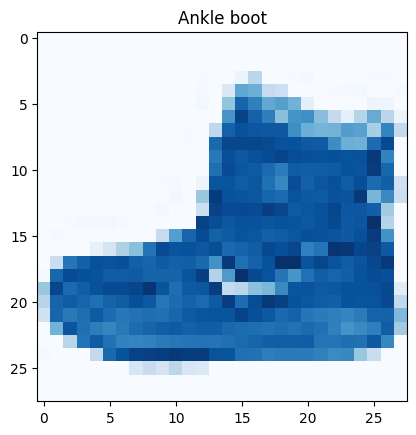

In [64]:
image, label = train_data[0]

print(f"Image shape before squeeze: {image.shape}")
image = image.squeeze()
print(f"Image shape after squeeze: {image.shape}")

plt.imshow(image, cmap=plt.cm.Blues)
plt.title(classes[label])

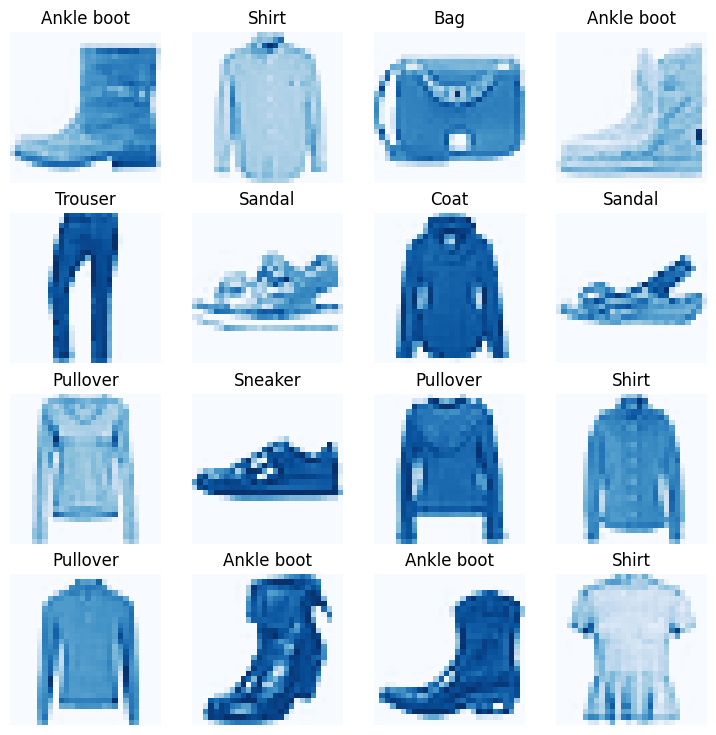

In [84]:
# plot more images

torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))

rows, cols = 4, 4

for i in range(1, rows*cols + 1):

    random_index = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_index]

    plt.subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap=plt.cm.Blues)
    plt.title(classes[label])
    plt.axis(False)